In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [3]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv')
df

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933
...,...,...
1299,2019-11-29,171584
1300,2019-11-30,141161
1301,2019-12-01,142918
1302,2019-12-02,220144


In [4]:
df = df.set_index('date')
df


,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [5]:
# Clean data
lower_th = df['value'].quantile(0.025)
upper_th = df['value'].quantile(0.975)
print(f"Supperieur a 2.5%: {lower_th}")
print(f"Inferieur a 97.5%: {upper_th}")

Supperieur a 2.5%: 17876.4
Inferieur a 97.5%: 177613.075


In [6]:
df_inf = df[df['value'] < lower_th]

In [7]:
df_inf.count()

value    33
dtype: int64

In [8]:
df_sup = df[df['value'] > upper_th]
df_sup.count()

value    33
dtype: int64

In [9]:
df_c = df[(df['value'] > lower_th) & (df['value'] < upper_th)]
df_c

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


In [10]:
df_c

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


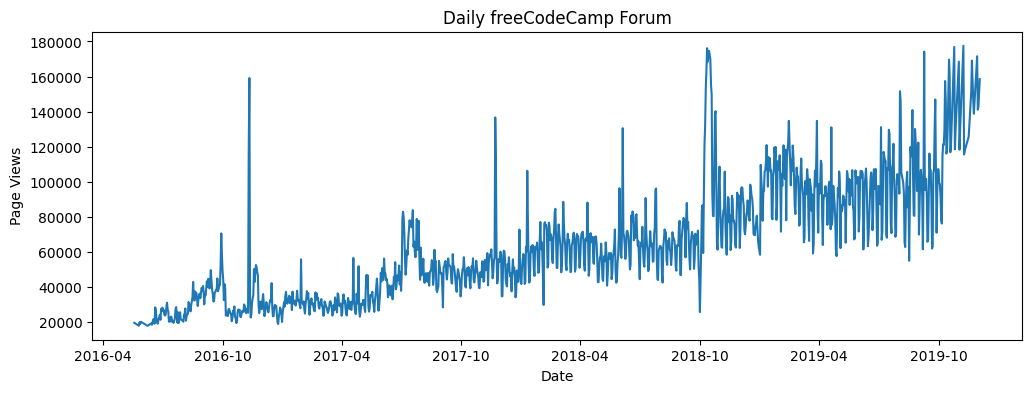

In [11]:
import matplotlib.dates as mdates
# def draw_line_plot():
# Draw line plot
df_c.index = pd.to_datetime(df_c.index)
fig, ax = plt.subplots(1, 1, sharey=True, figsize=(12, 4))
ax.set_title("Daily freeCodeCamp Forum")
ax.set_ylabel("Page Views")
ax.set_xlabel('Date')

sns.lineplot(data=df_c, x='date', y='value', ax=ax)
# Save image and return fig (don't change this part)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.show()
# fig.savefig('line_plot.png')
# return fig

In [12]:
df_copy = df_c
df_copy.index = pd.to_datetime(df_copy.index)

In [13]:
df_c

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


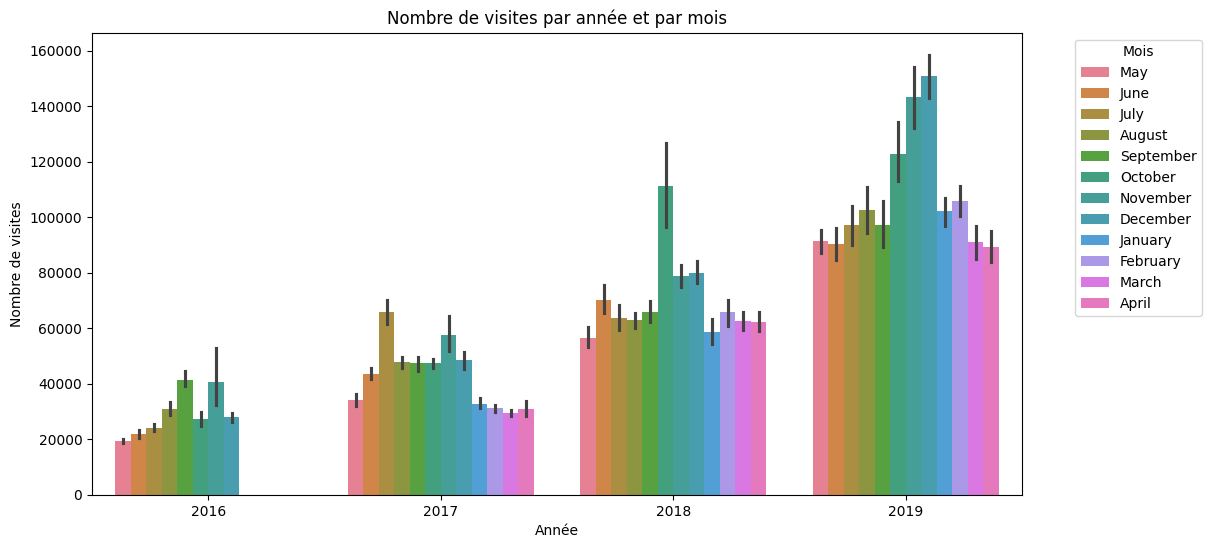

In [14]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df_c.index.year, y='value', hue=df_c.index.month_name(), data=df_c)

# Nommez les axes et donnez un titre au graphique
plt.xlabel('Année')
plt.ylabel('Nombre de visites')
plt.title('Nombre de visites par année et par mois')

# Affichez la légende et ajustez la position si nécessaire
plt.legend(title='Mois', bbox_to_anchor=(1.05, 1), loc='upper left')

# Affichez le graphique
plt.show()

In [15]:
df_c

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


In [16]:
df_c.dropna(axis=1)

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


In [17]:
df_c.index = pd.to_datetime(df_c.index)
df_c.dropna(axis=1)
# Grouper les données par année et mois, puis calculer la somme ou la moyenne des visites
grouped = df_c.groupby([df_c.index.year, df_c.index.strftime('%B')])['value'].mean().unstack()
grouped.fillna(0, inplace=True)
grouped

date,April,August,December,February,January,July,June,March,May,November,October,September
date,,,,,,,,,,,,
2016,0.000000,31049.193548,27832.419355,0.000000,0.000000,24109.678571,21875.105263,0.000000,19432.400000,40448.633333,27398.322581,41476.866667
2017,30878.733333,47712.451613,48420.580645,31113.071429,32785.161290,65806.838710,43577.500000,29369.096774,34244.290323,57701.566667,47438.709677,47376.800000
2018,62350.833333,62831.612903,80047.483871,65679.000000,58580.096774,63591.064516,70117.000000,62693.774194,56562.870968,78688.333333,111378.142857,65941.733333
2019,89368.433333,102717.310345,150733.500000,105968.357143,102056.516129,97236.566667,90435.642857,91214.483871,91439.903226,143166.428571,122802.272727,97268.833333


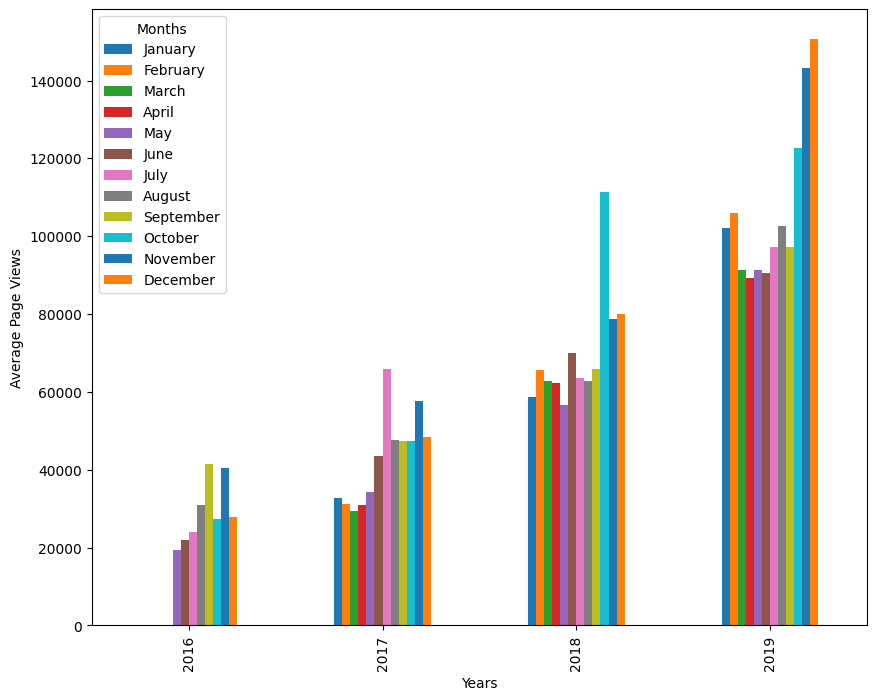

In [18]:
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Réorganiser les colonnes selon l'ordre correct des mois
grouped = grouped[months_order]
# Tracer un barplot pour chaque mois
fig, ax = plt.subplots(figsize=(10, 8))
grouped.plot(kind='bar', ax=ax)

# Formater l'axe des x pour afficher les années
plt.xticks()
# plt.gca().ticklabel_format(style='plain', axis='y', useOffset=False)
# Ajouter des étiquettes et un titre
ax.set_xlabel('Years')
ax.set_ylabel('Average Page Views')

# Afficher la légende et ajuster la position
ax.legend(title='Months')

plt.show()

In [19]:
df_box = df_c.copy()
df_box.reset_index(inplace=True)
df_box['date'] = pd.to_datetime(df_box['date'])
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
df_box

,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May
...,...,...,...,...
1233,2019-11-24,138875,2019,Nov
1234,2019-11-29,171584,2019,Nov
1235,2019-11-30,141161,2019,Nov
1236,2019-12-01,142918,2019,Dec


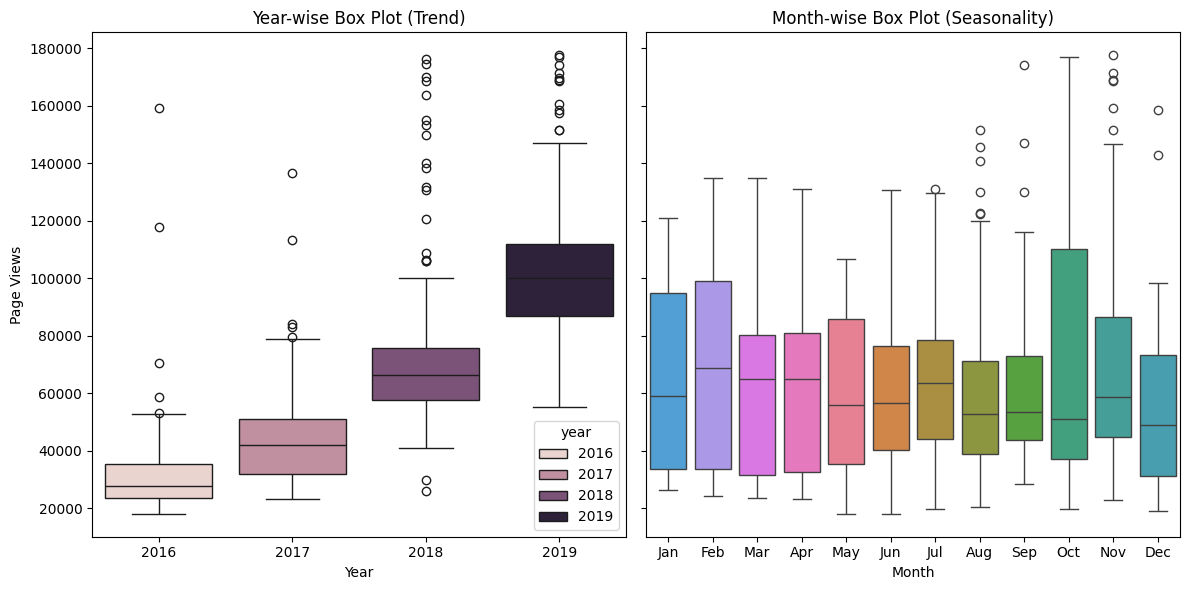

In [21]:
# Draw box plots (using Seaborn)
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='year', y='value', data=df_box, hue='year', ax=ax[0])
plt.title('Year-wise Box Plot (Trend)')
plt.xlabel('Year')
plt.ylabel('Page Views')
plt.gca().ticklabel_format(style='plain', axis='y', useOffset=False)
# Tracer un diagramme de boîte pour chaque mois
months_ord = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.subplot(1, 2, 2)
sns.boxplot(x='month', y='value', data=df_box, hue='month', ax=ax[1], order=months_ord)
plt.title('Month-wise Box Plot (Seasonality)')
plt.xlabel('Month')
plt.ylabel('Page Views')
plt.gca().ticklabel_format(style='plain', axis='y', useOffset=False)

plt.tight_layout()
plt.show()